In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 0.3
values = np.array([[60.0, 32.0], [37.0, 40.0], [29.0, 10.0]])
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3) * 4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

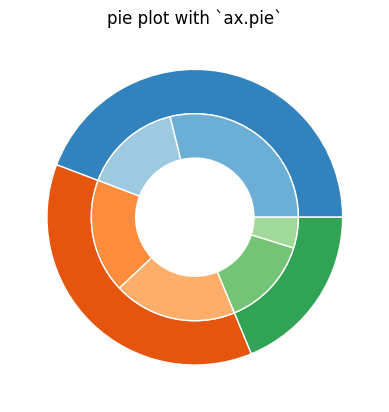

In [3]:
fig, ax = plt.subplots()
ax.pie(
    values.sum(axis=1), radius=1, colors=outer_colors,
    wedgeprops={"width": size, "edgecolor": "w"},
)
ax.pie(
    values.flatten(), radius=1 - size, colors=inner_colors,
    wedgeprops={"width": size, "edgecolor": "w"},
)
ax.set(aspect="equal", title="pie plot with `ax.pie`")
plt.show()

In [4]:
# normalize vals to 2 pi
values_norm = values / np.sum(values) * 2 * np.pi
# obtain the ordinates of the bar edges
values_left = np.cumsum(np.append(0, values_norm.flatten()[:-1])).reshape(values.shape)

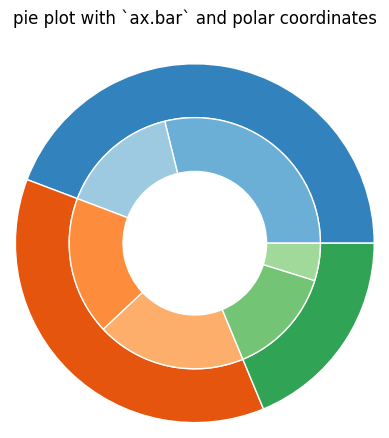

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.bar(
    x=values_left[:, 0], width=values_norm.sum(axis=1), bottom=1 - size,
    height=size, color=outer_colors, edgecolor="w", linewidth=1, align="edge",
)
ax.bar(
    x=values_left.flatten(), width=values_norm.flatten(), bottom=1 - 2 * size,
    height=size, color=inner_colors, edgecolor="w", linewidth=1, align="edge",
)
ax.set(title="pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()